<a href="https://colab.research.google.com/github/prat-man/CSE-575-Statistical-Machine-Learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

In [2]:
import httpimport

with httpimport.remote_repo('https://raw.githubusercontent.com/prat-man/CSE-575-Statistical-Machine-Learning/main'):
    from data import get_data

In [3]:
seed = 0

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = get_data('LSTM')

In [5]:
scaler = StandardScaler()

train_old_shape = X_train.shape
train_new_shape = X_train.shape[0] * X_train.shape[1], X_train.shape[2]

val_old_shape = X_val.shape
val_new_shape = X_val.shape[0] * X_val.shape[1], X_val.shape[2]

test_old_shape = X_test.shape
test_new_shape = X_test.shape[0] * X_test.shape[1], X_test.shape[2]

X_train = scaler.fit_transform(X_train.reshape(train_new_shape)).reshape(train_old_shape)
X_val = scaler.transform(X_val.reshape(val_new_shape)).reshape(val_old_shape)
X_test = scaler.transform(X_test.reshape(test_new_shape)).reshape(test_old_shape)

In [6]:
model_layers = [
    Input((X_train.shape[1], X_train.shape[2])),

    LSTM(1024, return_sequences=True),

    LSTM(2048, return_sequences=True),

    LSTM(1024, return_sequences=False),

    Dense(1024),

    Dense(1024),

    Dense(10, activation='softmax')
]

model = Sequential(model_layers)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 1024)          4431872   
                                                                 
 lstm_1 (LSTM)               (None, 10, 2048)          25174016  
                                                                 
 lstm_2 (LSTM)               (None, 1024)              12587008  
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 44,302,346
Trainable params: 44,302,346
No

In [9]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64)

Epoch 1/20
10/10 [==============================] - 10s 193ms/step - loss: 2.1189 - accuracy: 0.3283 - val_loss: 1.4200 - val_accuracy: 0.4450
Epoch 2/20
10/10 [==============================] - 1s 69ms/step - loss: 1.3281 - accuracy: 0.5100 - val_loss: 1.8314 - val_accuracy: 0.4700
Epoch 3/20
10/10 [==============================] - 1s 69ms/step - loss: 1.3416 - accuracy: 0.5633 - val_loss: 1.4285 - val_accuracy: 0.4850
Epoch 4/20
10/10 [==============================] - 1s 70ms/step - loss: 1.0182 - accuracy: 0.6700 - val_loss: 1.3535 - val_accuracy: 0.6550
Epoch 5/20
10/10 [==============================] - 1s 76ms/step - loss: 0.8126 - accuracy: 0.7367 - val_loss: 1.2218 - val_accuracy: 0.6600
Epoch 6/20
10/10 [==============================] - 1s 76ms/step - loss: 0.7402 - accuracy: 0.7600 - val_loss: 1.4119 - val_accuracy: 0.6000
Epoch 7/20
10/10 [==============================] - 1s 68ms/step - loss: 0.6806 - accuracy: 0.7683 - val_loss: 1.3256 - val_accuracy: 0.6300
Epoch 8/20


In [10]:
_, accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {accuracy}')

19/19 [==============================] - 0s 18ms/step - loss: 0.2608 - accuracy: 0.9267
Training Accuracy: 0.9266666769981384


In [11]:
y_pred = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

7/7 [==============================] - 1s 14ms/step


In [12]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62        20
           1       1.00      0.75      0.86        20
           2       0.59      0.65      0.62        20
           3       0.67      0.60      0.63        20
           4       0.59      0.80      0.68        20
           5       0.90      0.95      0.93        20
           6       0.94      0.80      0.86        20
           7       0.79      0.75      0.77        20
           8       0.69      0.55      0.61        20
           9       0.61      0.70      0.65        20

    accuracy                           0.72       200
   macro avg       0.74      0.72      0.72       200
weighted avg       0.74      0.72      0.72       200



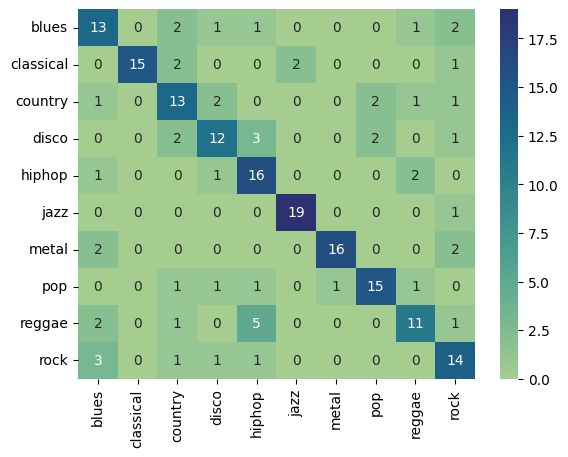

In [13]:
conf_m = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_m, cmap='crest', annot=True)

plt.xticks(ticks = np.arange(0.5, 10, 1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0.5, 10, 1), labels=labels,rotation=0)

plt.savefig('ANN_Confusion_Matrix.png', dpi=300)

In [14]:
accuracy = np.trace(conf_m) / np.sum(conf_m)
print(f'Overall test accuracy = {accuracy}')

Overall test accuracy = 0.72


In [15]:
accuracy_df = pd.DataFrame(columns=['accuracy'])

class_acc = conf_m.diagonal() / conf_m.sum(axis=1)
for i in range(len(labels)):
    accuracy_df.loc[labels[i]] = [round(class_acc[i], 2)]

accuracy_df

,accuracy
blues,0.65
classical,0.75
country,0.65
disco,0.60
hiphop,0.80
jazz,0.95
metal,0.80
pop,0.75
reggae,0.55
rock,0.70


In [16]:
model.save('ANN.h5')